## MS1: Exploratory Data Analysis

### Get the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Step 1: Read the file train.csv into Python and print a few rows

In [2]:
full_data = pd.read_csv("../data/train.csv")

In [3]:
test_for_kaggle = pd.read_csv("../data/test.csv")

In [4]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_for_kaggle.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Train-Validation split

#### Separate features and label (target)

In [6]:
full_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [7]:
X = full_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = full_data['Survived']

#### Train-Test split

In [8]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
# Import train-test-split
from sklearn.model_selection import train_test_split

In [11]:
# The function train_test_split() randomly separate the data. If you want controll the randomness you set the random_state to a value
Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.25)

In [12]:
# Always check the shape of your train and test arrays to check if this was done correctly
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((668, 7), (223, 7), (668,), (223,))

In [13]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
618,2,female,4.0,2,1,39.0000,S
156,3,female,16.0,0,0,7.7333,Q
275,1,female,63.0,1,0,77.9583,S
529,2,male,23.0,2,1,11.5000,S
278,3,male,7.0,4,1,29.1250,Q
...,...,...,...,...,...,...,...
451,3,male,NaN,1,0,19.9667,S
514,3,male,24.0,0,0,7.4958,S
425,3,male,NaN,0,0,7.2500,S
429,3,male,32.0,0,0,8.0500,S


In [14]:
df_train = pd.concat([Xtrain,ytrain], axis=1)

In [15]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
618,2,female,4.0,2,1,39.0000,S,1
156,3,female,16.0,0,0,7.7333,Q,1
275,1,female,63.0,1,0,77.9583,S,1
529,2,male,23.0,2,1,11.5000,S,0
278,3,male,7.0,4,1,29.1250,Q,0
...,...,...,...,...,...,...,...,...
451,3,male,NaN,1,0,19.9667,S,0
514,3,male,24.0,0,0,7.4958,S,0
425,3,male,NaN,0,0,7.2500,S,0
429,3,male,32.0,0,0,8.0500,S,1


### Explore the Data

In [16]:
import matplotlib.pyplot as plt

### Step 2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

#### Calculate the number of surviving/non-surviving passengers

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
Survived = df_train['Survived'].sum()

In [19]:
Survived

265

In [20]:
Survived = df_train['Survived'] == 1

In [21]:
TS= Survived.sum()

In [22]:
TS

265

In [23]:
Non_Survived = df_train['Survived'] == 0

In [24]:
TNS= Non_Survived.sum()

In [25]:
TNS

403

In [26]:
bp = TS + TNS

In [27]:
bp

668

#### Display it as a bar plot

In [28]:
label_1= df_train['Survived'].unique()[0]

In [29]:
label_0= df_train['Survived'].unique()[1]

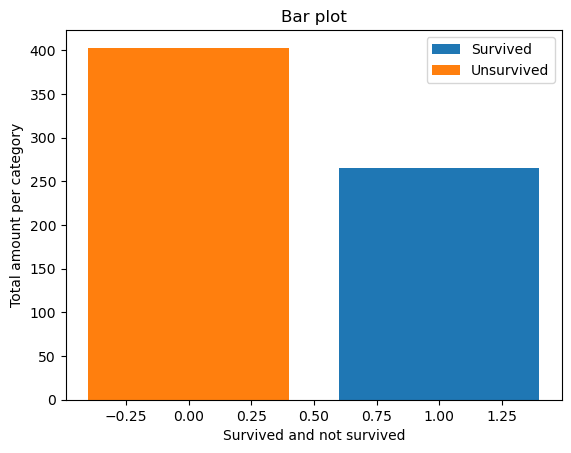

In [30]:
plt.bar(x =label_1, height= TS, label = "Survived")
plt.bar(x =label_0, height= TNS, label = "Unsurvived")
plt.title('Bar plot')
plt.xlabel('Survived and not survived') 
plt.ylabel('Total amount per category')
plt.legend()

### Step 3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [31]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
618,2,female,4.0,2,1,39.0000,S,1
156,3,female,16.0,0,0,7.7333,Q,1
275,1,female,63.0,1,0,77.9583,S,1
529,2,male,23.0,2,1,11.5000,S,0
278,3,male,7.0,4,1,29.1250,Q,0
...,...,...,...,...,...,...,...,...
451,3,male,NaN,1,0,19.9667,S,0
514,3,male,24.0,0,0,7.4958,S,0
425,3,male,NaN,0,0,7.2500,S,0
429,3,male,32.0,0,0,8.0500,S,1


In [32]:
First= df_train['Pclass'] == 1

In [33]:
First

618    False
156    False
275     True
529    False
278    False
       ...  
451    False
514    False
425    False
429    False
354    False
Name: Pclass, Length: 668, dtype: bool

In [34]:
First_total = (df_train['Pclass'] == 1).sum()

In [35]:
First_total

168

In [36]:
df_train[['Pclass', 'Survived']]

,Pclass,Survived
618,2,1
156,3,1
275,1,1
529,2,0
278,3,0
...,...,...
451,3,0
514,3,0
425,3,0
429,3,1


In [37]:
First_Surv = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1) ]

In [38]:
First_Surv

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
275,1,female,63.0,1,0,77.9583,S,1
224,1,male,38.0,1,0,90.0000,S,1
55,1,male,NaN,0,0,35.5000,S,1
512,1,male,36.0,0,0,26.2875,S,1
710,1,female,24.0,0,0,49.5042,C,1
...,...,...,...,...,...,...,...,...
645,1,male,48.0,1,0,76.7292,C,1
307,1,female,17.0,1,0,108.9000,C,1
862,1,female,48.0,0,0,25.9292,S,1
268,1,female,58.0,0,1,153.4625,S,1


In [39]:
First_Surv_total_all= First_Surv.count()

In [40]:
First_Surv_total_all

Pclass      111
Sex         111
Age         100
SibSp       111
Parch       111
Fare        111
Embarked    109
Survived    111
dtype: int64

In [41]:
First_Surv_total= len(First_Surv)

In [42]:
First_Surv_total

111

In [43]:
result= First_Surv_total/First_total*100
print(result)

66.07142857142857


### Step 4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [44]:
Male = (df_train['Sex'] == "male").sum()

<AxesSubplot: xlabel='Sex', ylabel='count'>

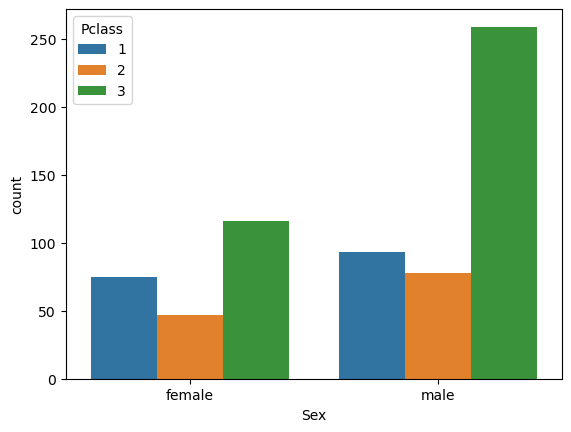

In [45]:
sns.countplot(data=df_train, x= "Sex", hue= "Pclass")

In [84]:
df_train.groupby(by = ["Sex", "Pclass"]).count()

Age  SibSp  Parch  Fare  Embarked  Survived
Sex    Pclass                                             
female 1        68     75     75    75        73        75
       2        45     47     47    47        47        47
       3        82    116    116   116       116       116
male   1        80     93     93    93        93        93
       2        71     78     78    78        78        78
       3       183    259    259   259       259       259

<AxesSubplot: xlabel='Sex,Pclass'>

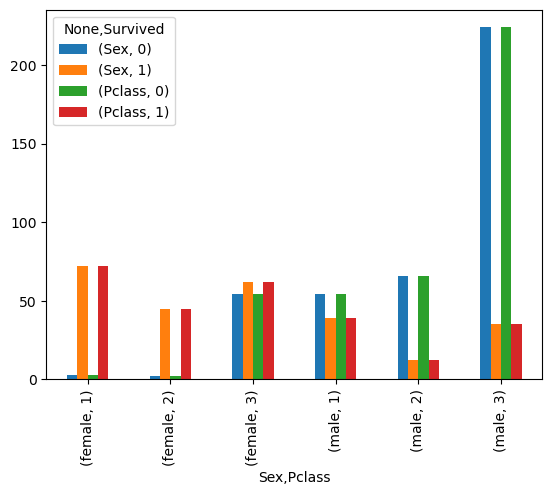

In [47]:
df_train.groupby(by = ["Sex", "Pclass","Survived"])[["Sex", "Pclass"]].count().unstack().plot.bar()

#### Alternative way, that did not work properly

In [48]:
# Male

In [49]:
# Female = (df_train['Sex'] == "female").sum()

In [50]:
# Female

In [51]:
# First= First.sum()

In [52]:
# Second= (df_train['Pclass'] == 2).sum()

In [53]:
# Second

In [54]:
# Third= (df_train['Pclass'] == 3).sum()

In [55]:
# Third

In [56]:
# label_male= df_train['Sex'].unique()[0]

In [57]:
# label_male

In [58]:
# label_female= df_train['Sex'].unique()[1]

In [59]:
# label_female

In [60]:
# label_first= df_train['Pclass'].unique()[0]

In [61]:
# label_first

In [62]:
# label_second= df_train['Pclass'].unique()[1]

In [63]:
# label_second

In [64]:
# label_third= df_train['Pclass'].unique()[2]

In [65]:
# label_third

In [66]:
# plt.bar(x =label_male, height= Male, label = "Male")
# plt.bar(x =label_female, height= Female, label = "Female")
# plt.bar(x =label_first, height= First, label = "1st class")
# plt.bar(x =label_second, height= Second, label = "2nd class")
# plt.bar(x =label_third, height= Third, label = "3rd class")
# plt.title('Bar plot')
# plt.xlabel('Passengers') 
# plt.ylabel('Total amount of passengers')
# plt.axis([0.0, 3.5, 0.0, 500.0])
# plt.legend()

### Step 5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

#### Comparison of surviving and non-surviving passengers

<AxesSubplot: xlabel='Age', ylabel='Count'>

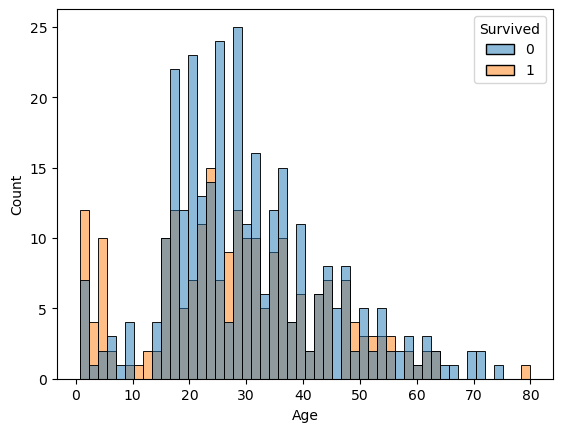

In [76]:
sns.histplot(data=df_train, x= "Age", hue= "Survived", bins=50, color="red")

In [135]:
# Age_Surv = df_train[(df_train['Age']) & (df_train['Survived'] == 1) ]

#### Only surviving passengers

C:\Users\helge\AppData\Local\Temp\ipykernel_10992\1511023850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_train['Age'] [df_train['Survived'] == 1])


<AxesSubplot: xlabel='Age', ylabel='Density'>

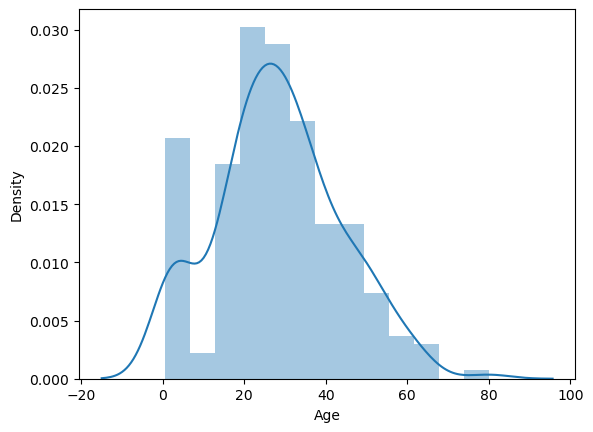

In [134]:
sns.distplot(a=df_train['Age'] [df_train['Survived'] == 1])

In [ ]:
Age_Surv = df_train

In [94]:
Age_Surv = df_train['Survived'].isin([1])

In [102]:
df_train[Age_Surv]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
618,2,female,4.0,2,1,39.0000,S,1
156,3,female,16.0,0,0,7.7333,Q,1
275,1,female,63.0,1,0,77.9583,S,1
570,2,male,62.0,0,0,10.5000,S,1
691,3,female,4.0,0,1,13.4167,C,1
...,...,...,...,...,...,...,...,...
862,1,female,48.0,0,0,25.9292,S,1
268,1,female,58.0,0,1,153.4625,S,1
195,1,female,58.0,0,0,146.5208,C,1
543,2,male,32.0,1,0,26.0000,S,1


In [99]:
df_train["Age"]

618     4.0
156    16.0
275    63.0
529    23.0
278     7.0
       ... 
451     NaN
514    24.0
425     NaN
429    32.0
354     NaN
Name: Age, Length: 668, dtype: float64

In [136]:
# Age_Surv = df_train[(df_train['Age']) & (df_train['Survived'].isin([1])]

In [137]:
# Age_Surv = df_train['Age'] & df_train['Survived'].isin([1])

#### Idea, of printing it with colors for survived and unsurvived passengers

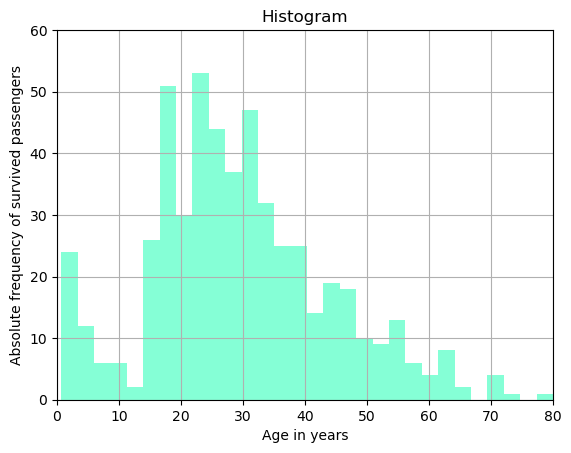

In [138]:
df_train["Age"].hist(alpha=0.95, facecolor='#7fffd4', histtype='bar', bins=30)
Male = (df_train['Sex'] == "male")
plt.title('Histogram')
plt.xlabel('Age in years')
plt.ylabel('Absolute frequency of survived passengers')
plt.axis([0.0, 80.0, 0.0, 60.0])

plt.savefig('histo.png')

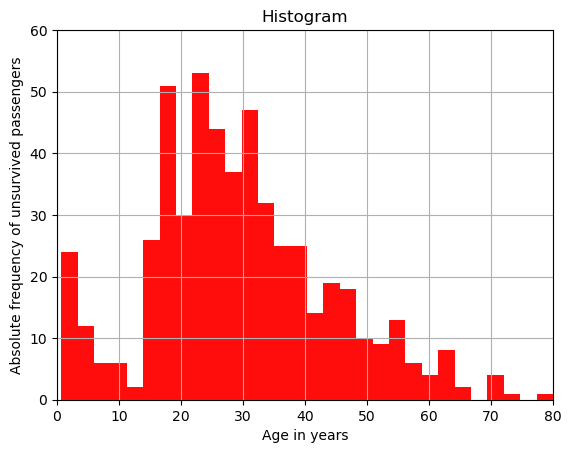

In [142]:
df_train["Age"].hist(alpha=0.95, facecolor='#ff0000', histtype='bar', bins=30)
plt.title('Histogram')
plt.xlabel('Age in years')
plt.ylabel('Absolute frequency of unsurvived passengers')
plt.axis([0.0, 80.0, 0.0, 60.0])

plt.savefig('histo.png')

In [140]:
# df_train.groupby(by = ["Age", "Survived" == 1]).hist(alpha=0.95, facecolor='#7fffd4', histtype='bar', bins=30)

#### Only non-surviving passengers

C:\Users\helge\AppData\Local\Temp\ipykernel_10992\2323445732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_train['Age'] [df_train['Survived'] == 0])


<AxesSubplot: xlabel='Age', ylabel='Density'>

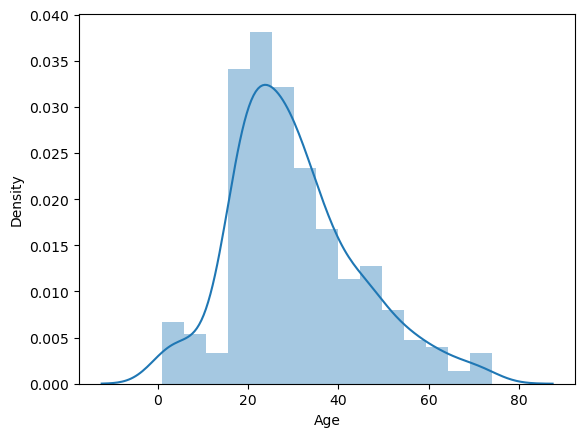

In [133]:
sns.distplot(a=df_train['Age'] [df_train['Survived'] == 0])

In [141]:
# Age_Unsurv = df_train[(df_train['Age']) & (df_train['Survived'] == 0) ]

### Step 6: Calculate the average age for survived and drowned passengers separately.

#### Deskriptive Statistics for df_train

In [115]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,529.000000,668.00000,668.000000,668.000000,668.000000
mean,2.309880,29.470227,0.51497,0.375749,33.005445,0.396707
std,0.847304,14.661995,1.09985,0.773131,52.201447,0.489581
min,1.000000,0.670000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.00000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.00000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.00000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.00000,5.000000,512.329200,1.000000


#### Only Survived passengers

In [147]:
print((df_train['Age'] [df_train['Survived'] == 1]).mean())

28.332207207207208


#### Only Unsurvived passengers

In [148]:
print((df_train['Age'] [df_train['Survived'] == 0]).mean())

30.293159609120522


### Step 7: Replace missing age values by the mean age.

In [151]:
df_train['Age'].fillna(df_train['Age'].mean())

618     4.000000
156    16.000000
275    63.000000
529    23.000000
278     7.000000
         ...    
451    29.470227
514    24.000000
425    29.470227
429    32.000000
354    29.470227
Name: Age, Length: 668, dtype: float64

In [152]:
# Age_NaN = df_train['Age'].isin(["NaN"])

### Step 8: Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [ ]:
Male = (df_train['Sex'] == "male").sum()

In [ ]:
sns.countplot(data=df_train, x= "Sex", hue= "Pclass")

In [153]:
df_train.groupby(by = ["Survived", "Sex", "Pclass", ]).count()

Age  SibSp  Parch  Fare  Embarked
Survived Sex    Pclass                                   
0        female 1         3      3      3     3         3
                2         2      2      2     2         2
                3        42     54     54    54        54
         male   1        45     54     54    54        54
                2        60     66     66    66        66
                3       155    224    224   224       224
1        female 1        65     72     72    72        70
                2        43     45     45    45        45
                3        40     62     62    62        62
         male   1        35     39     39    39        39
                2        11     12     12    12        12
                3        28     35     35    35        35

In [155]:
df_train.groupby(by = ["Survived", "Pclass", "Sex"]).count()

Age  SibSp  Parch  Fare  Embarked
Survived Pclass Sex                                      
0        1      female    3      3      3     3         3
                male     45     54     54    54        54
         2      female    2      2      2     2         2
                male     60     66     66    66        66
         3      female   42     54     54    54        54
                male    155    224    224   224       224
1        1      female   65     72     72    72        70
                male     35     39     39    39        39
         2      female   43     45     45    45        45
                male     11     12     12    12        12
         3      female   40     62     62    62        62
                male     28     35     35    35        35

In [156]:
df_train.groupby(by = ["Survived", "Pclass", "Sex"])[["Survived", "Pclass", "Sex"]].count()

Survived  Pclass  Sex
Survived Pclass Sex                          
0        1      female         3       3    3
                male          54      54   54
         2      female         2       2    2
                male          66      66   66
         3      female        54      54   54
                male         224     224  224
1        1      female        72      72   72
                male          39      39   39
         2      female        45      45   45
                male          12      12   12
         3      female        62      62   62
                male          35      35   35